# Question

## 1 - Analisa Descriptive Statistic

1. Berapa tingkat pembatalan secara keseluruhan untuk pemesanan hotel?
2. Berapa tingkat pembatalan untuk masing-masing hotel?
3. Mana yang lebih tinggi, rata-rata tarif harian (ADR) untuk pemesanan hotel yang dibatalkan atau yang tidak dibatalkan?
4. Berapa tingkat pembatalan untuk pemesanan yang dilakukan melalui masing-masing saluran distribusi?
5. Mana yang lebih tinggi, rata-rata waktu pemesanan untuk hotel dibatalkan atau yang tidak dibatalkan?

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set_style("darkgrid")

# Import Dataset

In [2]:
df = pd.read_csv('hotel_bookings.csv')

df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Analysis

## 1. Berapa tingkat pembatalan secara keseluruhan untuk pemesanan hotel?

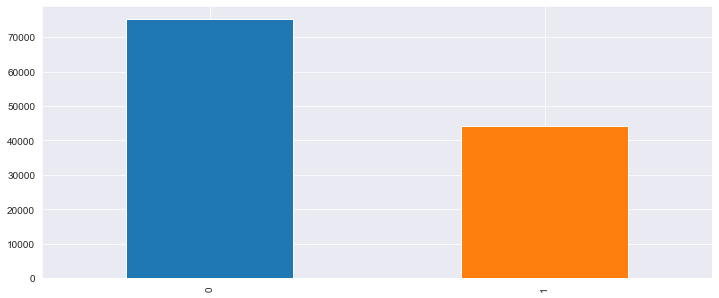

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

In [4]:
# define color bar
colors = sns.color_palette()[:2]

# bar plot
plt.figure(figsize=(12,5))
df['is_canceled'].value_counts().plot(kind='bar', color=colors)
plt.show()

# proportion
df['is_canceled'].value_counts()/len(df)

Berdasarkan data tersebut terdapat 75.166 (62.96%) yangh tidak dibatalkan dan 44.224 (37.04%) pemesanan yang dibatalkan. Menunjukkan terdapat lebih dari sepertiga data merupakan pemesanan yang dibatalkan. Jika proporsi ini memang mengacu pada data sebenarnya, maka pihak pengelola hotel serta pihak pemerintah dalam hal pariwisata perlu membuat kebijakan dan/atau strategi untuk mengurangi pembatalan pemesanan hotel tersebut.

## 2. Berapa tingkat pembatalan untuk masing-masing hotel?

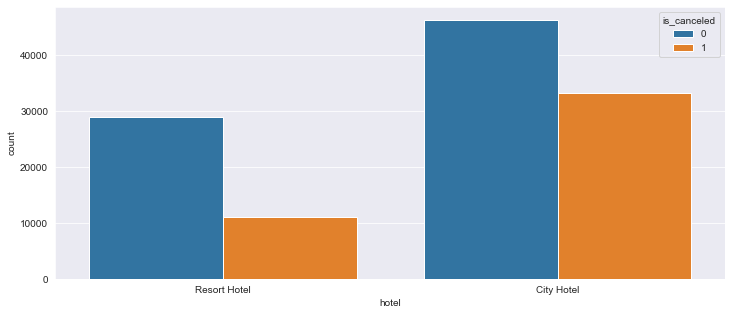

hotel         is_canceled
City Hotel    0              58.273037
              1              41.726963
Resort Hotel  0              72.236645
              1              27.763355
dtype: float64

In [5]:
# bar plot
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='hotel', hue='is_canceled')
plt.show()

# proportion each type
total_bookings = df.groupby('hotel')['hotel'].count()
count_bookings = df.groupby(['hotel', 'is_canceled'])['is_canceled'].count()
(count_bookings/total_bookings) * 100

- Pada Resort Hotel memiliki pembatalan sebesar 2893 atau sebesar 27,76%
- Pada City Hotel memiliki pembatalan sebesar 33102 atau sebesar 41,73%
- Menunjukkan City Hotel memiliki kemungkinan pembatalan lebih besar dibandingkan dengan Resort Hotel.

## 3. Mana yang lebih tinggi, rata-rata tarif harian (ADR) untuk pemesanan hotel yang dibatalkan atau yang tidak dibatalkan?

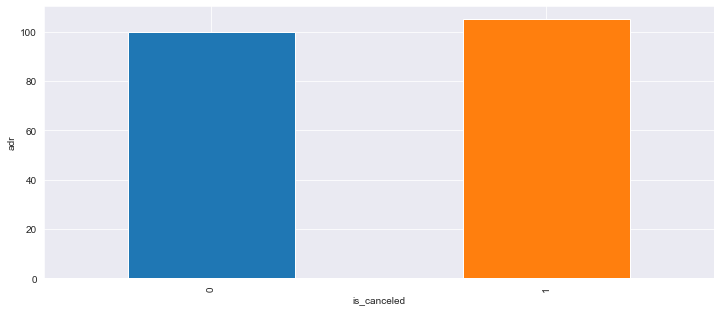

In [6]:
# define color bar
colors = sns.color_palette()[:2]

# barplot
plt.figure(figsize=(12,5))
df.groupby(['is_canceled'])['adr'].mean().plot(kind='bar', color=colors, ylabel='adr')
plt.show()

Diketahui rerata ADR jika melakukan pembatalan hotel sebesar 104,96. Dimana rerata itu lebih tinggi dibandingkand dengan rerata yang tidak melakukan pembatalan. Hal ini dapat menjadi landasan jika pengelola hotel dapat memberikan harga lebih rendah atau kompetitif untuk mengurangi tingkat pembatalan hotel.

## 4. Berapa tingkat pembatalan untuk pemesanan yang dilakukan melalui masing-masing saluran distribusi?

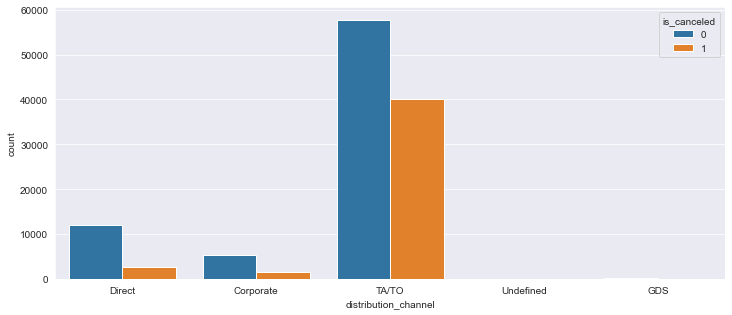

distribution_channel  is_canceled
Corporate             0              77.924217
                      1              22.075783
Direct                0              82.540116
                      1              17.459884
GDS                   0              80.829016
                      1              19.170984
TA/TO                 0              58.974149
                      1              41.025851
Undefined             0              20.000000
                      1              80.000000
dtype: float64

In [7]:
# bar plot
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='distribution_channel', hue='is_canceled')
plt.show()

# proportion each type
total_bookings = df.groupby('distribution_channel')['distribution_channel'].count()
count_bookings = df.groupby(['distribution_channel', 'is_canceled'])['is_canceled'].count()
(count_bookings/total_bookings) * 100

- Probabilitas pemesanan dibatalkan untuk  TA/TO sebesar 41.03% dengan TA/TO merupkan saluran distribusi yang mendominasi dibandingkan dengan yang lain.
- Pihak hotel perlu menyelidiki saluran distribusi TA/TO terkait besarnya probabilitas pembatalan karena saluran distribusi tersebut mendominasi pemesanan hotel.
- Saluran distribusi Direct memiliki probabilitas paling rendah dibandingkan dengan yang lainnya. Pihak hotel dapat memprioritaskan pembelian menggunakan saluran Direct karena hal tersebut.

## 5. Mana yang lebih tinggi, rata-rata waktu pemesanan untuk hotel dibatalkan atau yang tidak dibatalkan?

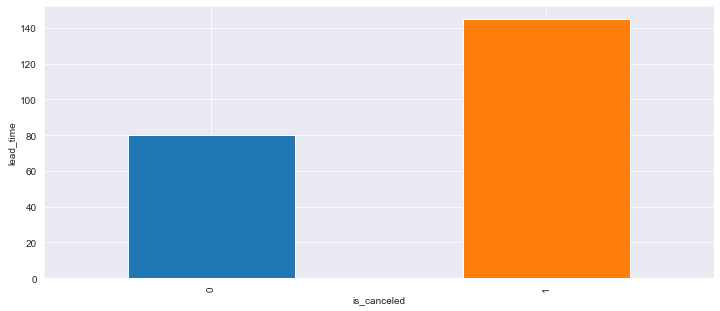

In [8]:
# define color bar
plt.figure(figsize=(12,5))
colors = sns.color_palette()[:2]

# barplot
df.groupby(['is_canceled'])['lead_time'].mean().plot(kind='bar', color=colors, ylabel='lead_time')
plt.show()

Menunjukkan semakin lama seseorang melakukan waktu pemesanan (interval antara waktu pemesanan dengan kedatangan) semakin besar peluang seseorang untuk melakukan pemnatalan pemesanan hotel. Namun perlu analisis lebih lanjut mengenai hal terdsebut